<a href="https://colab.research.google.com/github/CeliaDiazSanchez/Data-Mining/blob/LAB02/Copia_de_LAB02_CLAUDIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**LABORATORIO 2**
**Grupo**: B01

**Integrantes**: Claudia Esnarrizaga, Ana Robledano, Celia Díaz, Julia Callaba

## **PRÁCTICA 1 (Reglas de Asociación)**

##**Enunciado**

Usa la librería `mlxtend` que nos permita solucionar todos los problemas relacionados con las reglas de
asociación. Para ello tendremos que usar el algoritmo Apriori y una serie de métodos para obtener la distinta
información que este genera.

Usaremos la librería con el Dataset **Market_Basket_Optimisation.csv** que se ha proporcionado.

Prueba al menos tres configuraciones de soporte y frecuencia para cada tipo de puntuación.

Importamos las librerías necesarias y el archivo.

In [ ]:
import requests
import warnings
import pandas as pd
import numpy as np
import plotly.express as px
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules
import networkx as nx
import matplotlib.pyplot as plt

# URL del archivo CSV en GitHub
url = "https://raw.githubusercontent.com/CeliaDiazSanchez/Data-Mining/LAB02/Market_Basket_Optimisation.csv"
nombre = 'Market_Basket_Optimisation.csv'


# Realizar la solicitud GET para obtener el contenido del archivo
response = requests.get(url)

# Verificar si la solicitud fue exitosa (código de estado 200)
if response.status_code == 200:
     # Guardar el contenido del archivo en un archivo local
    with open(nombre, 'wb') as f:
        f.write(response.content)
    print("Archivo descargado exitosamente.")
else:
    print("Error al descargar el archivo.")

Archivo descargado exitosamente.


Cargamos el archivo de Market_Basket_Optimisation CSV en un DataFrame de pandas que llamamos ds.

In [ ]:
ds = pd.read_csv('Market_Basket_Optimisation.csv')
# Mostramos las 10 primeras entradas del dataset
ds.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,whole wheat pasta,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,soup,light cream,shallot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,frozen vegetables,spaghetti,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,eggs,pet food,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Exploración de la base de datos

Si vemos la base de datos, es muy rara porque tenemos un montón de NaNs y, además, nos sale que el título de cada columna es un alimento. Si abrimos la base de datos en su formato original, observamos que en realidad son filas con la lista de la compra de 7501 personas.

Por ello, no tenemos que limpiar nada, ya que esos NaNs no nos están sesgando, simplemente lo imprime mal.

Estas serían las 10 primeras líneas de nuestra base de datos:
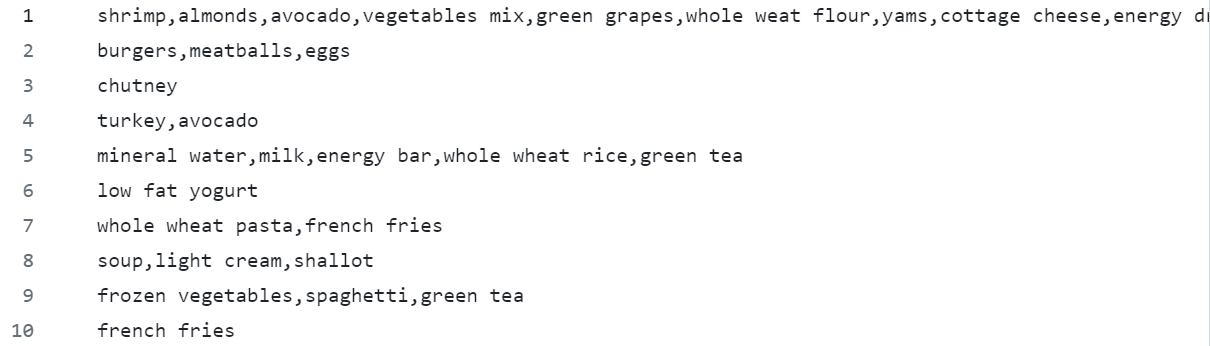

## **Resolución**

Primero tenemos que instalar la librería `mlxtend`. Esta librería se utiliza comúnmente para extender las capacidades de otras bibliotecas populares de machine learning, como scikit-learn.

In [ ]:
!pip install mlxtend

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Obtenemos los datos y los introducimos en una lista para posteriormente aplicar el algoritmo Apriori. De esta manera, tendremos todas las transacciones de cada persona. Lo podemos ver como si fuera una matriz, la cual vamos recorriendo elemento a elemento y guardando cada uno de ellos en una lista ordenada (vector).

Como son muchísimos datos (7501 filas con varios elementos cada una), sale un warning de la librería numpy, que vamos a eliminar porque es un output de gran tamaño que no nos aporta ningún tipo de información.

In [ ]:
# Desactivamos los warnings
warnings.filterwarnings('ignore')

transacciones = []

i = 0
n_rows, n_cols = ds.shape
while i < n_rows * n_cols:
    row = i // n_cols
    col = i % n_cols
    transacciones.append(ds.values[row, col])
    i += 1

transacciones = np.array(transacciones)

# Volvemos a activar los warnings
warnings.filterwarnings('default')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Utilizamos `np.array()` de NumPy para convertir la lista en un array unidimensional. Esto es necesario porque el algoritmo Apriori de `mlxtend` espera un conjunto de transacciones, donde cada transacción es una lista de elementos.

Veamos qué pinta tiene nuestro vector con todas las transacciones:

In [ ]:
print(transacciones)

['burgers' 'meatballs' 'eggs' ... 'nan' 'nan' 'nan']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


###**Preprocesamiento y análisis exploratorio de datos**

#### **k = 1**

**1. Creación del DataFrame inicial:**

In [ ]:
df = pd.DataFrame(transacciones, columns=["items"])

**2. Añadir una columna 'incident_count':**

In [ ]:
df["Frecuencia soporte"] = 1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Esta columna se usará para contar la frecuencia de cada elemento en las transacciones.

**3. Eliminar filas con valor "nan" en la columna 'items'**

In [ ]:
indexNames = df[df['items'] == "nan" ].index
df.drop(indexNames , inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**4. Agrupar y contar la frecuencia de cada elemento ('items'):**

In [ ]:
df_table = df.groupby("items").sum().sort_values("Frecuencia soporte", ascending=False).reset_index()

**5. Visualización de las primeras 120 filas con estilo de degradado de color:**

In [ ]:
df_table.head(120).style.background_gradient(cmap='Blues')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bo

,items,Frecuencia soporte
0,mineral water,1787
1,eggs,1348
2,spaghetti,1306
3,french fries,1282
4,chocolate,1230
5,green tea,990
6,milk,972
7,ground beef,737
8,frozen vegetables,715
9,pancakes,713


Cada línea muestra un elemento y la cantidad de veces que aparece en las transacciones. Está ordenado de mayor a menor, siendo *mineral water* el elemento que más aparece en las transacciones y *asparagus* el que menos (solamente aparece una vez).

A continuación lo mostraremos usando un `treemap interactivo` para visualizar la frecuencia de los 60 elementos con la mayor frecuencia en el conjunto de datos.

In [ ]:
# Desactivamos los warnings
warnings.filterwarnings('ignore')

df_table["all"] = "60 items that have highest freqs"

fig = px.treemap(df_table.head(60), path=['all', "items"], values='Frecuencia soporte',
                  color=df_table["Frecuencia soporte"].head(60), hover_data=['items'],
                  color_continuous_scale='Blues',
                )

fig.show()

# Volvemos a activar los warnings
warnings.filterwarnings('default')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### **k = 2**

Realizamos el mismo proceso para k = 2. Ahora nuestra lista de transacciones será una lista de listas, con las combinaciones de los elementos anteriores.

In [ ]:
# Desactivamos los warnings
warnings.filterwarnings('ignore')

k2_transacciones = []

i = 0
while i < ds.shape[0]:
    k2_transacciones.append([str(ds.values[i, j]) for j in range(ds.shape[1])])
    i += 1

k2_transacciones = np.array(k2_transacciones)

# Volvemos a activar los warnings
warnings.filterwarnings('default')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



`TransactionEncoder` es una herramienta de la librería `mlxtend` diseñada para convertir una lista de transacciones en una matriz binaria.

En esta matriz, cada columna corresponde a un item, y cada fila representa una transacción, con valores binarios indicando la presencia o ausencia de cada item en dicha transacción.

El proceso de ajuste y transformación se realiza mediante la combinación de `te.fit(transacciones).transform(transacciones)`, donde se ajusta el `TransactionEncoder` a las transacciones y se transforman en una matriz binaria.

Posteriormente, crearemos un DataFrame de pandas (`pd.DataFrame`) con la matriz binaria transformada, utilizando las etiquetas originales de los items como nombres de columnas. La visualización de las primeras filas del DataFrame mediante `ds.head()` nos permite inspeccionar la estructura y contenido de la matriz binaria resultante.

In [ ]:
TE = TransactionEncoder()

# Ajustar y transformar las transacciones usando TransactionEncoder
matriz = TE.fit(k2_transacciones).transform(k2_transacciones)

# Crear un DataFrame con la matriz transformada y columnas etiquetadas
ds = pd.DataFrame(matriz, columns = TE.columns_)

# Mostrar las primeras filas del DataFrame resultante
ds.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Creamos un nuevo DataFrame que conserva todas las filas, pero solo incluye las columnas cuyos nombres corresponden a los items únicos encontrados en el DataFrame `df_table`.

In [ ]:
ds_limpia = df_table["items"].values
ds = ds.loc[:, ds_limpia]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



####**FP-Growth**

Utilizamos el algoritmo FP-Growth (Frequent Pattern Growth) para encontrar conjuntos de ítems frecuentes.

In [ ]:
itemsets_frec_005 = fpgrowth(ds, min_support=0.05, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
itemsets_frec_005.sort_values("support",ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,support,itemsets
3,0.238267,(mineral water)
0,0.179733,(eggs)
10,0.174133,(spaghetti)
8,0.170933,(french fries)
14,0.163867,(chocolate)
4,0.132000,(green tea)
5,0.129600,(milk)
20,0.098267,(ground beef)
11,0.095333,(frozen vegetables)
18,0.095067,(pancakes)


Esto nos revela varios patrones de compra en el conjunto de datos.

Los productos individuales más frecuentes incluyen "mineral water," "eggs," "french fries," y "spaghetti."

Además, se identificaron combinaciones frecuentes, como la asociación entre "eggs" y "mineral water," "spaghetti" y "mineral water," y "chocolate" y "mineral water."

Esto nos sugiere tendencias de compra específicas, lo que podría ser valioso para estrategias de colocación de productos y promociones en el supermercado. El análisis proporciona información sobre la frecuencia y asociaciones de productos que podrían ser utilizadas para mejorar la experiencia del cliente y aumentar las ventas.

A continuación probaremos con un soporte mayor:

In [ ]:
itemsets_frec_01 = fpgrowth(ds, min_support=0.1, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
itemsets_frec_01.sort_values("support",ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,support,itemsets
1,0.238267,(mineral water)
0,0.179733,(eggs)
5,0.174133,(spaghetti)
4,0.170933,(french fries)
6,0.163867,(chocolate)
2,0.132000,(green tea)
3,0.129600,(milk)


Al aumentar el soporte mínimo, nos da muchos menos itemsets. Probemos con uno aún menor que el 0.05:

In [ ]:
itemsets_frec_0025 = fpgrowth(ds, min_support=0.025, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
itemsets_frec_0025.sort_values("support",ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,support,itemsets
4,0.238267,(mineral water)
0,0.179733,(eggs)
13,0.174133,(spaghetti)
10,0.170933,(french fries)
19,0.163867,(chocolate)
...,...,...
41,0.026533,(energy drink)
38,0.025733,(cereals)
45,0.025600,(vegetables mix)
51,0.025467,"(eggs, green tea)"


Ahora, como podíamos esperar, tenemos muchos más patrones.

**¿Qué diferencias hay entre usar soporte y frecuencia? Respalda la respuesta con datos**

La principal diferencia radica en cómo se expresan los resultados. El soporte es una medida relativa que representa la proporción de transacciones que contiene un conjunto específico, mientras que la frecuencia es una medida absoluta que cuenta cuántas veces aparece ese conjunto.

Por lo tanto, para el caso en el que el soporte mínimo es 0.01, tendríamos que sacar la frecuencia soporte que equivaldría a la multiplicación de 0.01 * nuúmero total de transacciones que tenemos (7501).

Esto significa que estamos buscando conjuntos de ítems que aparezcan al menos 750 veces en las 7501 transacciones.


In [ ]:
# Frecuencia mínima requerida
frecuencia_minima = 750

# Calcular el soporte mínimo
min_support = frecuencia_minima / len(ds)

# Utilizar fpgrowth con min_support calculado
itemsets_frec_01 = fpgrowth(ds, min_support=min_support, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
itemsets_frec_01.sort_values("support",ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,support,itemsets
1,0.238267,(mineral water)
0,0.179733,(eggs)
5,0.174133,(spaghetti)
4,0.170933,(french fries)
6,0.163867,(chocolate)
2,0.132000,(green tea)
3,0.129600,(milk)


Efectivamente nos da lo mismo que haciéndolo con el mínimo soporte.

####**Reglas de asociación**

Ahora crearemos las reglas de asociación para el caso donde el soporte mínimo es 0.05:

In [ ]:
reglas_asociacion_005 = association_rules(itemsets_frec_005, metric = "lift", min_threshold = 1.1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
reglas_asociacion_005.sort_values("confidence", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(spaghetti),(mineral water),0.174133,0.238267,0.059733,0.343032,1.439698,0.018243,1.159468,0.369806
4,(chocolate),(mineral water),0.163867,0.238267,0.052667,0.321400,1.348907,0.013623,1.122506,0.309351
0,(eggs),(mineral water),0.179733,0.238267,0.050933,0.283383,1.189351,0.008109,1.062957,0.194090
3,(mineral water),(spaghetti),0.238267,0.174133,0.059733,0.250699,1.439698,0.018243,1.102184,0.400941
5,(mineral water),(chocolate),0.238267,0.163867,0.052667,0.221041,1.348907,0.013623,1.073398,0.339566
1,(mineral water),(eggs),0.238267,0.179733,0.050933,0.213766,1.189351,0.008109,1.043286,0.209004


**¿Qué tipo de reglas desaparecen según la configuración usada y el tipo de puntuación? ¿Por qué?**

Las reglas que han desaparecido son aquellas asociadas con items o combinaciones menos frecuentes y asociaciones más débiles. Si hacemos las reglas de asociación con aquellos itemsets en los que el soporte mínimo es menor, por ejemplo, las de 0.025, entonces obtendremos algunas reglas que se han descartado para el caso de soporte mínimo = 0.05.

Vamos a comprobarlo:

In [ ]:
reglas_asociacion_0025 = association_rules(itemsets_frec_0025, metric = "lift", min_threshold = 1.1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
reglas_asociacion_0025.sort_values("confidence", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
44,(olive oil),(mineral water),0.065733,0.238267,0.027467,0.417850,1.753707,0.011805,1.308483,0.460018
38,(ground beef),(mineral water),0.098267,0.238267,0.040933,0.416554,1.748266,0.017520,1.305576,0.474647
41,(ground beef),(spaghetti),0.098267,0.174133,0.039200,0.398915,2.290857,0.022088,1.373959,0.624888
24,(frozen vegetables),(mineral water),0.095333,0.238267,0.035733,0.374825,1.573133,0.013019,1.218433,0.402718
8,(milk),(mineral water),0.129600,0.238267,0.048000,0.370370,1.554436,0.017121,1.209812,0.409789
34,(pancakes),(mineral water),0.095067,0.238267,0.033733,0.354839,1.489250,0.011082,1.180687,0.363034
18,(spaghetti),(mineral water),0.174133,0.238267,0.059733,0.343032,1.439698,0.018243,1.159468,0.369806
42,(cake),(mineral water),0.081067,0.238267,0.027467,0.338816,1.422002,0.008151,1.152074,0.322947
3,(burgers),(eggs),0.087200,0.179733,0.028800,0.330275,1.837585,0.013127,1.224782,0.499351
28,(chocolate),(mineral water),0.163867,0.238267,0.052667,0.321400,1.348907,0.013623,1.122506,0.309351


Efectivamente, podemos comprobar que disminuyendo el soporte nos saca muchas más reglas.

**Para una de las configuraciones, interpreta algunas de las reglas que te hayan resultado curiosas obtenidas
usando la clase `association_rules` y un par de configuraciones cambiando la variable `metric` y `min_threshold`.**

Debido a que las reglas que nos genera el itemset con un soporte 0.025 es más exacto y nos da mayores confianzas, vamos a utilizar ese para modificar el valor del lift:

In [ ]:
itemsets_rules_lift = association_rules(itemsets_frec_0025, metric="lift", min_threshold=1.3)
itemsets_rules_lift.sort_values("confidence", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
30,(olive oil),(mineral water),0.065733,0.238267,0.027467,0.417850,1.753707,0.011805,1.308483,0.460018
24,(ground beef),(mineral water),0.098267,0.238267,0.040933,0.416554,1.748266,0.017520,1.305576,0.474647
27,(ground beef),(spaghetti),0.098267,0.174133,0.039200,0.398915,2.290857,0.022088,1.373959,0.624888
14,(frozen vegetables),(mineral water),0.095333,0.238267,0.035733,0.374825,1.573133,0.013019,1.218433,0.402718
2,(milk),(mineral water),0.129600,0.238267,0.048000,0.370370,1.554436,0.017121,1.209812,0.409789
20,(pancakes),(mineral water),0.095067,0.238267,0.033733,0.354839,1.489250,0.011082,1.180687,0.363034
10,(spaghetti),(mineral water),0.174133,0.238267,0.059733,0.343032,1.439698,0.018243,1.159468,0.369806
28,(cake),(mineral water),0.081067,0.238267,0.027467,0.338816,1.422002,0.008151,1.152074,0.322947
1,(burgers),(eggs),0.087200,0.179733,0.028800,0.330275,1.837585,0.013127,1.224782,0.499351
16,(chocolate),(mineral water),0.163867,0.238267,0.052667,0.321400,1.348907,0.013623,1.122506,0.309351


Hemos aumentado un poco el valorde `min_threshold` para ver qué nos devuelve y nos depura un poco más las reglas.

Por ejemplo, para la Regla 2: olive oil ----> mineral water, interpretamos que la compra de chocolate está asociada con una mayor probabilidad (1.75 veces más) de comprar mineral water. Esto nos puede indicar una tendencia de los clientes a combinar estos dos productos.

**Dadas las mejores configuraciones. ¿Existen reglas o patrones que se repitan? ¿Podemos generalizar de alguna
manera como se comportan los clientes del supermercado?**

Hemos visto que la mejor configuración es la utilizada anteriormente (soporte = 0.025). No se repite ninguna regla pero sí que es verdad que mineral water está casi siempre incluida, como antecedente y como consecuente.

**Dado un antecesor, devolver todas las reglas que contengan a dicho antecesor.**

In [ ]:
antecedente = {"spaghetti"}

reglas = itemsets_rules_lift[itemsets_rules_lift['antecedents'].apply(lambda x: antecedente.issubset(set(x)))]

print("Reglas que contienen el antecesor deseado:")
reglas.sort_values("confidence", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Reglas que contienen el antecesor deseado:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
10,(spaghetti),(mineral water),0.174133,0.238267,0.059733,0.343032,1.439698,0.018243,1.159468,0.369806
18,(spaghetti),(chocolate),0.174133,0.163867,0.039200,0.225115,1.373768,0.010665,1.079042,0.329442
26,(spaghetti),(ground beef),0.174133,0.098267,0.039200,0.225115,2.290857,0.022088,1.163699,0.682292
4,(spaghetti),(milk),0.174133,0.129600,0.035467,0.203675,1.571569,0.012899,1.093022,0.440378
12,(spaghetti),(frozen vegetables),0.174133,0.095333,0.027867,0.160031,1.678643,0.011266,1.077023,0.489523
22,(spaghetti),(pancakes),0.174133,0.095067,0.025200,0.144717,1.522265,0.008646,1.058051,0.415423


**Dado un umbral mínimo devolver todas las reglas que cumplan con dicha confianza**

In [ ]:
umbral_confianza = 0.2

reglas_umbral = reglas[reglas['confidence'] >= umbral_confianza]

print("\nReglas que cumplen con el umbral mínimo de confianza:")
reglas_umbral.sort_values("confidence", ascending = False)


Reglas que cumplen con el umbral mínimo de confianza:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
10,(spaghetti),(mineral water),0.174133,0.238267,0.059733,0.343032,1.439698,0.018243,1.159468,0.369806
18,(spaghetti),(chocolate),0.174133,0.163867,0.039200,0.225115,1.373768,0.010665,1.079042,0.329442
26,(spaghetti),(ground beef),0.174133,0.098267,0.039200,0.225115,2.290857,0.022088,1.163699,0.682292
4,(spaghetti),(milk),0.174133,0.129600,0.035467,0.203675,1.571569,0.012899,1.093022,0.440378


####**Gráficas**

A continuación representaremos las reglas que nos han quedado anteriormente.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)

<ipython-input-30-25d922eb09e0>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<frozen importlib._bootstrap>:914: ImportWarning:

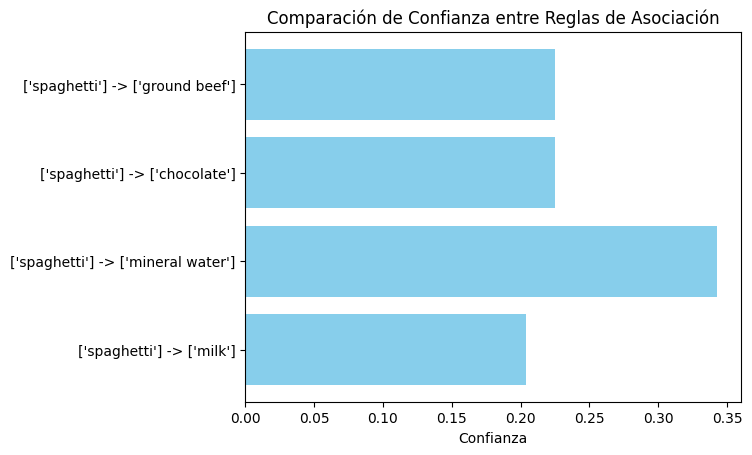

In [ ]:
reglas_umbral['etiqueta'] = reglas_umbral.apply(lambda row: f"{list(row['antecedents'])} -> {list(row['consequents'])}", axis=1)

plt.barh(reglas_umbral['etiqueta'], reglas_umbral['confidence'], color='skyblue')
plt.xlabel('Confianza')
plt.title('Comparación de Confianza entre Reglas de Asociación')
plt.show()

Viendo el gráfico, vemos claramente que lo que, con una confianza de 0.35 spaghetti -> mineral water, es decir, si compras spaghettis entonces, con una confianza del 35%, comprarás mineral water.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)



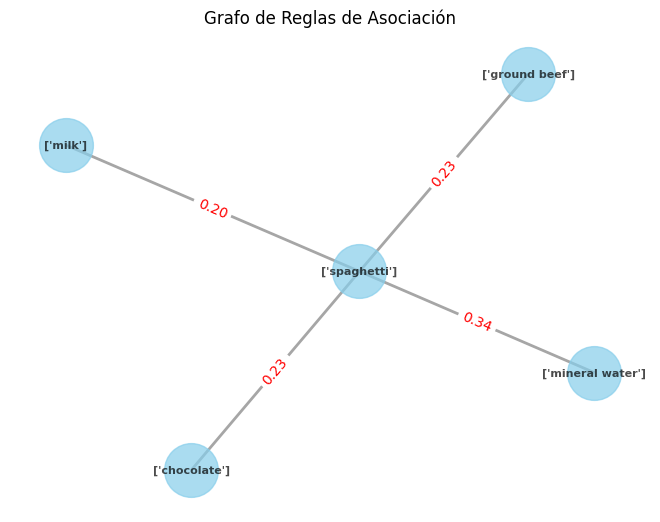

In [ ]:
G = nx.Graph()

# Agregar nodos y conexiones al grafo
for idx, row in reglas_umbral.iterrows():
    antecedents_list = list(row['antecedents'])
    consequents_list = list(row['consequents'])

    G.add_node(str(antecedents_list))
    G.add_node(str(consequents_list))
    G.add_edge(str(antecedents_list), str(consequents_list), weight=round(row['confidence'], 2))

# Dibujar el grafo
pos = nx.spring_layout(G)  # Puedes ajustar el layout según tus preferencias
nx.draw(G, pos, with_labels=True, font_size=8, node_size=1500, font_color='black', node_color='skyblue', edge_color='gray', width=2, alpha=0.7, font_weight='bold', edge_cmap=plt.cm.Blues)
labels = nx.get_edge_attributes(G, 'weight')
labels_formatted = {edge: f"{weight:.2f}" for edge, weight in labels.items()}  # Formatear el peso
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels_formatted, font_color='red')

plt.title('Grafo de Reglas de Asociación')
plt.show()

Hemos querido representar también las tres reglas definitivas que más confianza tienen:

In [ ]:
umbral_confianza = 0.38

reglas_umbral = itemsets_rules_lift[itemsets_rules_lift['confidence'] >= umbral_confianza]

print("\nReglas que cumplen con el umbral mínimo de confianza:")
reglas_umbral.sort_values("confidence", ascending = False)


Reglas que cumplen con el umbral mínimo de confianza:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
30,(olive oil),(mineral water),0.065733,0.238267,0.027467,0.417850,1.753707,0.011805,1.308483,0.460018
24,(ground beef),(mineral water),0.098267,0.238267,0.040933,0.416554,1.748266,0.017520,1.305576,0.474647
27,(ground beef),(spaghetti),0.098267,0.174133,0.039200,0.398915,2.290857,0.022088,1.373959,0.624888


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)



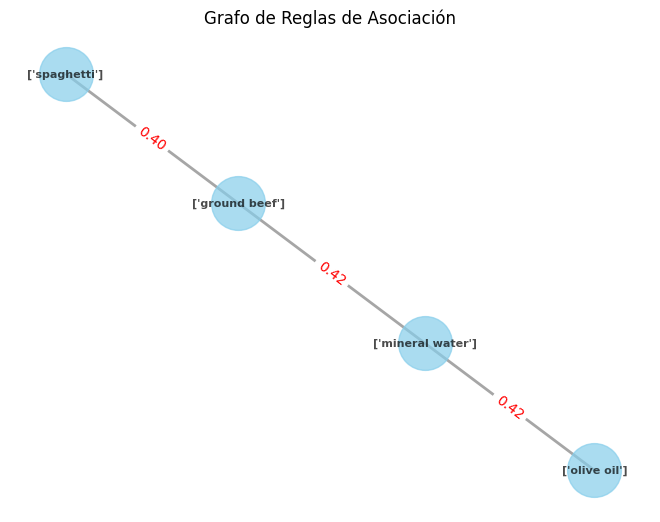

In [ ]:
G = nx.Graph()

# Agregar nodos y conexiones al grafo
for idx, row in reglas_umbral.iterrows():
    antecedents_list = list(row['antecedents'])
    consequents_list = list(row['consequents'])

    G.add_node(str(antecedents_list))
    G.add_node(str(consequents_list))
    G.add_edge(str(antecedents_list), str(consequents_list), weight=round(row['confidence'], 2))

# Dibujar el grafo
pos = nx.spring_layout(G)  # Puedes ajustar el layout según tus preferencias
nx.draw(G, pos, with_labels=True, font_size=8, node_size=1500, font_color='black', node_color='skyblue', edge_color='gray', width=2, alpha=0.7, font_weight='bold', edge_cmap=plt.cm.Blues)
labels = nx.get_edge_attributes(G, 'weight')
labels_formatted = {edge: f"{weight:.2f}" for edge, weight in labels.items()}  # Formatear el peso
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels_formatted, font_color='red')

plt.title('Grafo de Reglas de Asociación')
plt.show()

## **PRÁCTICA 2 (Patronces Secuenciales)**




##**Enunciado**

El conjunto de datos “Online Retail.xlsx” contiene productos (definidos por la columna StockCode y
Description) comprados por diferentes clientes (definidos por la columna CustomerID) en diferentes
momentos (definidos por el campo InvoiceDate. Habrá que procesar el fichero para crear una lista de los
distintos clientes con las secuencias de las transacciones de las compras realizadas en distintos instantes (2
puntos).

Una vez hecho esto y analizando esta información se pueden extraer conclusiones sobre en que orden
compran los clientes los productos y así tomar decisiones de negocio. Este estudio se puede llevar a cabo
aplicando el algoritmo Generalized Sequential Patterns utilizando la implementación de éste disponible en la
librería gsppy.

Prueba al menos dos configuraciones de soporte diferentes. (1 punto)
Para una de ellas, interpreta algunos de los patrones secuenciales que te resulten curiosos. (1 punto)

Saca conclusiones de negocio en virtud de algunas de las reglas elegidas por vosotros que mayor confianza
tengan(1 punto)

Librería gsppy:
Podéis encontrar su documentación en el siguiente enlace: https://pypi.org/project/gsppy/

Importamos las librerías necesarias y el archivo.

In [1]:
import requests
import pandas as pd

# URL del archivo CSV en GitHub
url = "https://raw.githubusercontent.com/CeliaDiazSanchez/Data-Mining/LAB02/Online Retail.xlsx"

nombre = 'Online Retail.xlsx'


# Realizar la solicitud GET para obtener el contenido del archivo
response = requests.get(url)

# Verificar si la solicitud fue exitosa (código de estado 200)
if response.status_code == 200:
     # Guardar el contenido del archivo en un archivo local
    with open(nombre, 'wb') as f:
        f.write(response.content)
    print("Archivo descargado exitosamente.")
else:
    print("Error al descargar el archivo.")

Archivo descargado exitosamente.


Cargamos el archivo de 'Online Retail.xlsx' en un DataFrame de pandas que llamamos `df`.

In [2]:
df = pd.read_excel('Online Retail.xlsx')

df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom


Creamos una copia de `df` para modificarla sin afectar al original

In [3]:
ds = df.copy()
id(df), id(ds)

(136695612338576, 136696431140512)

##**Resolución**

###**Limpieza y preprocesamiento de la base de datos**

Tenemos un DataFrame con 541909 registros y 8 atributos.

In [4]:
df.shape

(541909, 8)

In [5]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom


`df` contiene una base de datos de compras online de varios clientes a lo largo del tiempo. Para cada producto comprado por un cliente en una fecha se lleva un registro de las siguientes variables:

In [6]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

Con los siguientes tipos:

In [7]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object

- InvoiceNo: Este es el número de factura que identifica de forma única cada transacción de compra. Cada vez que se realiza una compra, se genera una nueva factura con un número de factura único.

- StockCode: Este es un código único que identifica un producto específico en el inventario de la tienda en línea. Cada producto en el inventario tiene su propio código de stock.

- Description: Esta columna proporciona una descripción del producto asociado con el código de stock. Proporciona información adicional sobre el producto, como su nombre o características.

- Quantity: Esta columna indica la cantidad de unidades del producto que se compraron en la transacción correspondiente. Por ejemplo, si se compra un producto en múltiples cantidades, el valor en esta columna será mayor que 1.

- InvoiceDate: Este es el timestamp que indica la fecha y hora en que se realizó la transacción de compra. Proporciona información sobre cuándo se llevó a cabo la compra.

- UnitPrice: Este es el precio unitario del producto en la moneda local en la que se realizó la transacción. Indica cuánto cuesta una sola unidad del producto.

- CustomerID: Este es el identificador único del cliente que realizó la compra. Cada cliente tiene un CustomerID único asociado con su cuenta en la tienda en línea.

- Country: Esta columna indica el país donde se realizó la transacción. Proporciona información sobre la ubicación geográfica del cliente que realizó la compra.

Los países que compran de la tienda son los siguientes:

In [8]:
import numpy as np
np.sort(df['Country'].unique())

array(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brazil', 'Canada',
       'Channel Islands', 'Cyprus', 'Czech Republic', 'Denmark', 'EIRE',
       'European Community', 'Finland', 'France', 'Germany', 'Greece',
       'Hong Kong', 'Iceland', 'Israel', 'Italy', 'Japan', 'Lebanon',
       'Lithuania', 'Malta', 'Netherlands', 'Norway', 'Poland',
       'Portugal', 'RSA', 'Saudi Arabia', 'Singapore', 'Spain', 'Sweden',
       'Switzerland', 'USA', 'United Arab Emirates', 'United Kingdom',
       'Unspecified'], dtype=object)

No parece que haya ningún error de transcripción, aunque sí que hay una categoría llamada `Unspecified`. Como en este estudio de patrones secuenciales no tendremos en cuenta el país, no hará falta hacer ninguna modificación.

Vamos a pasar los `StockCodes` y `Descripciones` a mayúsculas para evitar errores de este tipo.

In [9]:
# df['StockCode'] = df['StockCode'].str.upper()
# df['Description'] = df['Description'].str.upper()

###**Algunas cifras del dataset**

---



Hay transacciones de `4372` clientes distintos determinados por su ID.

In [10]:
df['CustomerID'].unique().size

4372

`4070` productos distintos determinados por su código de producto. No obstante, más adelante analizaremos los códigos para eliminar posibles errores de transcripción o datos irrelevantes.

In [11]:
df['StockCode'].unique().size

4070

`25900` facturas de compra distintas.

In [12]:
df['InvoiceNo'].unique().size

25900

`23260` días en los que hubo transacciones.

In [13]:
df['InvoiceDate'].unique().size

23260

Una factura está compuesta de varios productos por lo que esta se repite en tantos registros como productos contenga.

In [14]:
df['InvoiceNo'].value_counts()

573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
554023        1
554022        1
554021        1
554020        1
C558901       1
Name: InvoiceNo, Length: 25900, dtype: int64

Los `StockCodes` también se repiten como es de esperar. Productos del mismo tipo pueden ser comprados por personas distintas y/o en días distintos.

In [15]:
df['StockCode'].value_counts()

85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
21431        1
22275        1
17001        1
90187A       1
72759        1
Name: StockCode, Length: 4070, dtype: int64

Sin embargo para un mismo producto asociado a un `StockCode` puede tomar precios por unidad distintos.

In [16]:
df.groupby('StockCode')['UnitPrice'].unique()

StockCode
10002                                   [0.85, 1.66, 1.63, 0.0]
10080                                         [0.85, 0.39, 0.0]
10120                                                    [0.21]
10125                      [0.85, 1.66, 0.42, 0.81, 0.79, 1.63]
10133           [0.85, 1.66, 0.42, 0.81, 0.79, 1.63, 0.83, 0.0]
                                     ...                       
gift_0001_20                                [17.02, 16.67, 0.0]
gift_0001_30                                 [25.53, 25.0, 0.0]
gift_0001_40                                     [34.04, 33.33]
gift_0001_50                                     [42.55, 41.67]
m                                                        [2.55]
Name: UnitPrice, Length: 4070, dtype: object

Y también descripciones distintas, aunque algunas de ellas parecen errores ('nan', 'check')

In [17]:
df.groupby('StockCode')['Description'].unique()

StockCode
10002                          [INFLATABLE POLITICAL GLOBE , nan]
10080                      [GROOVY CACTUS INFLATABLE, nan, check]
10120                                              [DOGGY RUBBER]
10125                                   [MINI FUNKY DESIGN TAPES]
10133                     [COLOURING PENCILS BROWN TUBE, damaged]
                                      ...                        
gift_0001_20    [Dotcomgiftshop Gift Voucher £20.00, to push o...
gift_0001_30            [Dotcomgiftshop Gift Voucher £30.00, nan]
gift_0001_40                 [Dotcomgiftshop Gift Voucher £40.00]
gift_0001_50                 [Dotcomgiftshop Gift Voucher £50.00]
m                                                        [Manual]
Name: Description, Length: 4070, dtype: object

**Nota:** *como aún no se ha limpiado la base de datos, estas cantidades son orientativas. Podría haber errores de transcripción o datos inconsistentes que alteran los resultados. Este análisis a priori es solo para hacernos una idea aproximada de las proporciones de cantidades de clientes, productos, facturas, ... posterior a la limpieza podríamos repetir el proceso para mayor precisión.*

###**Ejemplo**

---



Vamos a tomar la primera factura de ejemplo, para analizar su contenido.

In [18]:
factura_test = df[df['InvoiceNo'] == 573585]
factura_test.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
430237,573585,11001,ASSTD DESIGN RACING CAR PEN,2,2011-10-31 14:41:00,3.29,15287,United Kingdom
430238,573585,15036,ASSORTED COLOURS SILK FAN,15,2011-10-31 14:41:00,1.63,15287,United Kingdom
430239,573585,15039,SANDALWOOD FAN,15,2011-10-31 14:41:00,1.63,15287,United Kingdom
430240,573585,15056BL,EDWARDIAN PARASOL BLACK,1,2011-10-31 14:41:00,12.46,15287,United Kingdom
430241,573585,15056N,EDWARDIAN PARASOL NATURAL,1,2011-10-31 14:41:00,12.46,15287,United Kingdom


In [19]:
factura_test['CustomerID'].unique().size

1

In [20]:
factura_test['InvoiceDate'].unique().size

1

De esta factura podemos sacar 3 observaciones:
- El número de factura no es compartido por más de un cliente.
- El número de factura no es compartido por más de una fecha.
- La factura contiene varios productos determinados por su `StockCode`.
Es decir, para cada compra de cada cliente en una fecha determinada, se crea una factura con ID único y que contiene ID's de productos.

En este caso hay 4 `StockCodes` repetidos, ya que la factura se repite en el dataset 1114 veces y solo hay 1110 `StockCodes` únicos para ese número de factura.

In [21]:
factura_test['StockCode'].unique().size

1110

4 no es una cantidad significativa, podría tratarse de errores en los datos del ejemplo elegido, veamos en otra factura si se da el mismo escenario:

In [22]:
factura_test2 = df[df['InvoiceNo'] == 581219]
# La factura aparece en 749 entradas
print(factura_test2.shape)
# Hay 749 StockCodes distintos asociados al nº de factura, uno para cada entrada
print(factura_test2['StockCode'].unique().size)

(749, 8)
749


En esta ocasión, no se repite ningún `StockCode` en la misma factura.

###**Estudio de NaNs**

Aparecen NaN's en el atributo `Description`, veremos qué porcentaje suponen y qué medidas tomar en base a ello.

In [23]:
df.isna().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

In [24]:
conteo_nans = df['Description'].isna().sum()
conteo_no_nans = len(df) - conteo_nans

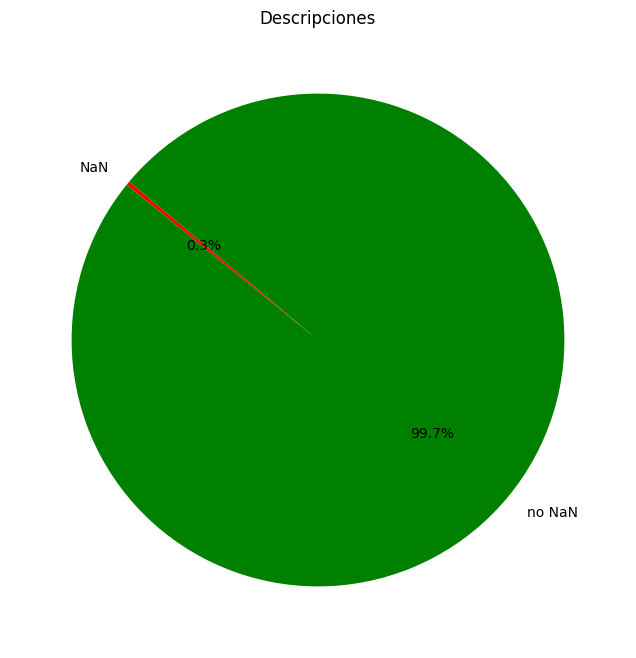

In [25]:
import matplotlib.pyplot as plt

sizes = [conteo_nans, conteo_no_nans]
labels = ['NaN','no NaN']

# Crear un gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',colors=['red','green'], startangle=140)

# Añadir título
plt.title('Descripciones')

# Mostrar el gráfico
plt.show()


Las entradas con descripciones NaN suponen un porcentaje muy bajo de las totales, podríamos eliminar dichas entradas pero antes limpiaremos la base de datos ya que podrían ser eliminados igualmente si pertenecen a registros con otros datos inconsistentes.

###**Limpieza de la base de datos**

####**Cantidades**

Entendemos que la cantidad de un producto es positiva cuando el cliente se lleva de la tienda artículos y negativa cuando los devuelve. Para confirmar esta hipótesis procedemos a analizar los datos con cantidades negativas.

In [26]:
negative = df[df['Quantity'] < 0]
negative.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom


Observamos que para el `StockCode` 'D', se trata de un descuento, que queda registrado como cantidad negativa.

In [27]:
discounts = df[df['StockCode'] == 'D']
discounts.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
9038,C537164,D,Discount,-1,2010-12-05 13:21:00,29.29,14527,United Kingdom
14498,C537597,D,Discount,-1,2010-12-07 12:34:00,281.00,15498,United Kingdom


In [28]:
print(discounts.shape[0])

77


Queda registrado que hubo `77` descuentos en total, y tomaban las siguientes cantidades negativas en la columna de `Quantity`

In [29]:
print(discounts['Quantity'].unique())

[  -1 -720 -240  -18  -48  -96]


Algunos descuentos toman cifras muy elevadas, esto podría provocar pérdidas a la tienda pero comprobamos que se trata de descuentos con `UnitPrice` muy bajos.

In [30]:
discounts.groupby('Quantity')['UnitPrice'].unique()

Quantity
-720                                               [0.01]
-240                                               [0.03]
-96                                                 [0.7]
-48                                                 [0.2]
-18                                                [1.45]
-1      [27.5, 29.29, 281.0, 267.12, 5.76, 42.5, 26.93...
Name: UnitPrice, dtype: object

Para analizar los demás registros con cantidades negativas, tomamos un ejemplo de un cliente que tiene una cantidad negativa en una de sus compras.

In [31]:
test = df[df['CustomerID'] == 15311]

Queremos ver qué productos están en la transacción de la factura que contiene la cantidad negativa.

In [32]:
test[test['InvoiceNo'] == 'C536383']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom


No compró otros productos en esa transacción.

Veamos si ese cliente compró el set de 3 patos coloreados voladores en otras ocasiones, y si aparecen con cantidades negativas.

In [33]:
test = df[df['CustomerID'] == 15311]
test[test['StockCode'] == '35004C']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
9200,537195,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2010-12-05 13:55:00,4.65,15311,United Kingdom
18196,C537805,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-08 13:18:00,4.65,15311,United Kingdom
28630,538651,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2010-12-13 15:07:00,4.65,15311,United Kingdom
39381,C539640,35004C,SET OF 3 COLOURED FLYING DUCKS,-3,2010-12-20 15:27:00,4.65,15311,United Kingdom
44157,540157,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2011-01-05 11:41:00,4.65,15311,United Kingdom
59542,541293,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2011-01-17 13:39:00,4.65,15311,United Kingdom
78333,C542866,35004C,SET OF 3 COLOURED FLYING DUCKS,-2,2011-02-01 12:14:00,4.65,15311,United Kingdom


En efecto, realizó varias compras del set, en ocasiones la compra aparece con cantridad del producto negativa, por lo que interpretamos que se trata de devoluciones del producto.

In [34]:
negative.shape[0] - discounts.shape[0]

10547

Parece que las cantidades negativas de productos se refieren a devoluciones o descuentos. Es interesante que de los `541909` eventos de productos comprados, `10421` son devueltos. Podría deberse a varios factores como que el producto estaba defectuoso, talla incorrecta, ... De cualquier manera, se trata de un problema distinto al de patrones secuenciales por lo que vamos a eliminar las entradas con valores negativos.

In [35]:
df = df.drop(df[df['Quantity'] < 0].index)
if df[df['Quantity'] < 0].shape[0] == 0:
  print('Los registros con cantidades de producto negativas fueron eliminados')

Los registros con cantidades de producto negativas fueron eliminados


Por otra parte no hay ninguna cantidad 0 de producto(s) comprados.

In [36]:
df[df['Quantity'] == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


####**Precios**

Hacemos el mismo proceso con los precios menores o iguales a 0.

In [37]:
df[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,15287,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,15287,United Kingdom


Según la descripción se trata de un error de cobro que fue arreglado.

In [38]:
df = df.drop(df[df['UnitPrice'] < 0].index)

A continuación veremos los precios que son 0.

In [39]:
cero_price = df[df['UnitPrice'] == 0]
cero_price.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,15287,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,15287,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,15287,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,15287,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,15287,United Kingdom
1988,536550,85044,NaN,1,2010-12-01 14:34:00,0.0,15287,United Kingdom
2024,536552,20950,NaN,1,2010-12-01 14:34:00,0.0,15287,United Kingdom
2025,536553,37461,NaN,3,2010-12-01 14:35:00,0.0,15287,United Kingdom
2026,536554,84670,NaN,23,2010-12-01 14:35:00,0.0,15287,United Kingdom
4348,536765,84952C,NaN,19,2010-12-02 14:43:00,0.0,15287,United Kingdom


A primera vista, aparecen bastantes NaN's. Veamos cuántos hay exactamente para este caso.

In [40]:
cero_price.size

9432

Las descripciones de los eventos con precios igual a cero, son inconsistentes. Podría tratarse de personas que no completaron el proceso de compra, cancelaron el envío u obtuvieron algún artículo gratis como parte de una promoción.

De `9400` registros con precios igual a cero, hay `588` de ellos con NaN en la descripción.

In [41]:
cero_price.isna().sum()

InvoiceNo        0
StockCode        0
Description    592
Quantity         0
InvoiceDate      0
UnitPrice        0
CustomerID       0
Country          0
dtype: int64

`32` clientes que realizaron transacciones con productos con precios igual a cero. Recordamos que anteriormente calculamos que hay `4339` clientes en total, los clientes con transacciones de productos de precio cero, suponen apenas un 0.74% del total y podría tratarse de familiares/amigos de la tienda que obtuvieron productos gratis.

In [42]:
cero_customers = cero_price['CustomerID'].unique().size
print(cero_customers)
normal_customers = df['CustomerID'].unique().size - cero_customers

32


Hacemos el mismo estudio con el número total de registros y el número de registros que contienen precios igual a cero.

In [43]:
cero_registers = cero_price.shape[0]
normal_registers = df.shape[0] - cero_registers

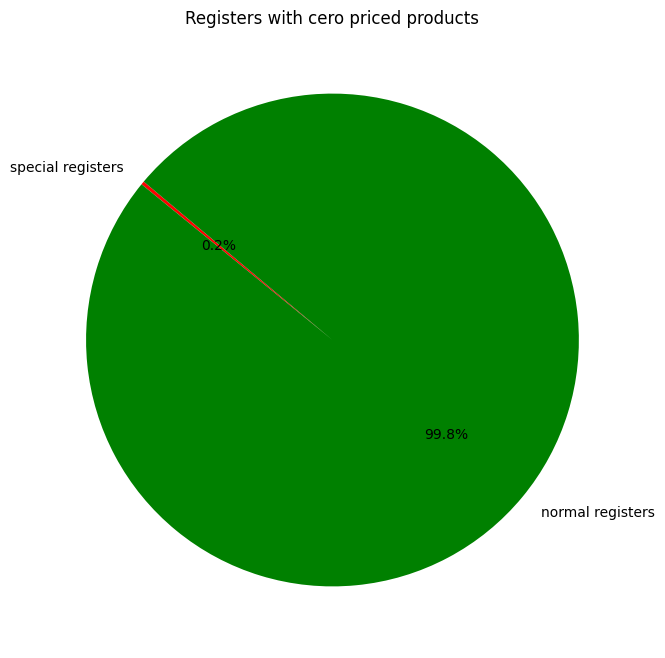

In [44]:
import matplotlib.pyplot as plt

sizes = [cero_registers, normal_registers]
labels = ['special registers','normal registers']

# Crear un gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',colors=['red','green'], startangle=140)

# Añadir título
plt.title('Registers with cero priced products')

# Mostrar el gráfico
plt.show()

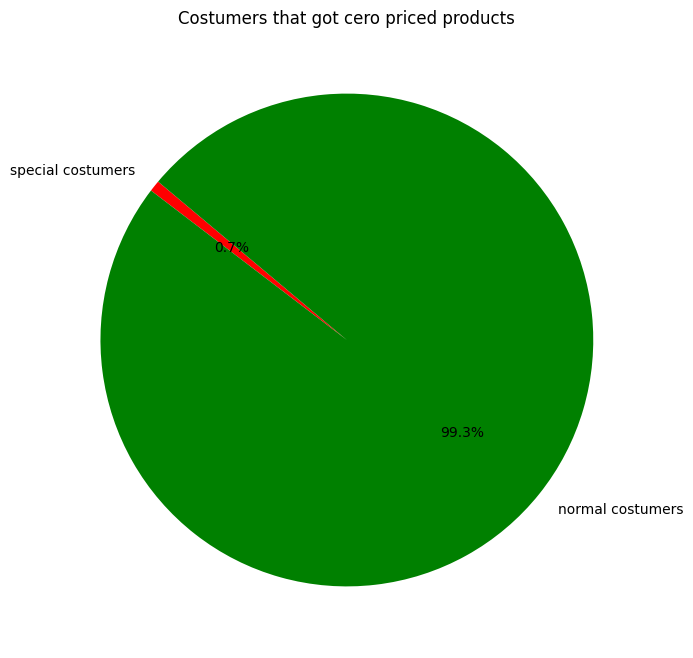

In [45]:

import matplotlib.pyplot as plt

sizes = [cero_customers, normal_customers]
labels = ['special costumers','normal costumers']

# Crear un gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',colors=['red','green'], startangle=140)

# Añadir título
plt.title('Costumers that got cero priced products')

# Mostrar el gráfico
plt.show()

Del total número de clientes solo el `0.7%` realizó transacciones de productos con precios igual a cero y del número total de registros solo el `0.2%` tienen productos con precio cero. Los productos comprados por precio cero no es un tipo de transacción que los clientes comunes realicen ni que se repite mucho, concluimos con que es irrelevante para estudiar los patrones de compra de clientes y lo eliminamos.

In [46]:
df = df.drop(df[df['UnitPrice'] == 0].index)

####**StockCodes**

Al ser una tienda online, se espera que en las transacciones haya una parte dedicada al envío de los productos adquiridos.

Encontramos que el StockCode `'POS'` hace referencia según la descripción, al servicio de envío postal. Este servicio no lo consideramos como producto de la tienda ya que no aporta ninguna información sobre las preferencias de los clientes.

In [47]:
df[df['StockCode'] == 'POST']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.0,12583,France
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.0,12791,Netherlands
1123,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.0,12662,Germany
5073,536840,POST,POSTAGE,1,2010-12-02 18:27:00,18.0,12738,Germany
5258,536852,POST,POSTAGE,1,2010-12-03 09:51:00,18.0,12686,France
...,...,...,...,...,...,...,...,...
541198,581493,POST,POSTAGE,1,2011-12-09 10:10:00,15.0,12423,Belgium
541216,581494,POST,POSTAGE,2,2011-12-09 10:13:00,18.0,12518,Germany
541730,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.0,12662,Germany
541767,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.0,12526,Germany


In [48]:
df = df.drop(df[df['StockCode'] == 'POST'].index)
if df[df['StockCode'] == 'POST'].shape[0] == 0:
  print('Se ha eliminado correctamente')

Se ha eliminado correctamente


Nos damos cuenta de que por lo general, el atributo `StockCode` es un código con números y a veces letras. No obstante, hay algunos registros con `StockCode` que no tienen forma de código, vamos a analizar esos casos.

Veamos los `StockCode` que tienen longitud 1.

In [49]:
# Convertir los valores de la columna 'StockCode' a cadenas de texto
codigos = df['StockCode'].unique()
codigos = codigos.astype(str)
v = []
for registro in codigos:
  if len(registro) < 2:
    v.append(registro)
# Convertir el vector en un conjunto para eliminar los duplicados
conjunto = set(v)

# Convertir el conjunto de nuevo en una lista
v= list(conjunto)
print(v)

['S', 'm', 'B', 'M']


Para analizarlos en base a sus descripciones:

In [50]:
# DataFrame vacío para almacenar los resultados
df_concatenado = pd.DataFrame()
for element in v:
  df_concatenado = pd.concat([df[df['StockCode'] == element], df_concatenado])
# Agrupamos por descripcion
df_concatenado.groupby('StockCode')['Description'].unique()

StockCode
B    [Adjust bad debt]
M             [Manual]
S            [SAMPLES]
m             [Manual]
Name: Description, dtype: object

In [51]:
df_concatenado[df_concatenado['StockCode'] == 'S'].head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
152709,549684,S,SAMPLES,1,2011-04-11 13:24:00,30.00,15287,United Kingdom
419666,572849,S,SAMPLES,1,2011-10-26 12:20:00,33.05,15287,United Kingdom


In [52]:
df_concatenado[df_concatenado['StockCode'] == 'M'].head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2239,536569,M,Manual,1,2010-12-01 15:35:00,1.25,16274,United Kingdom
2250,536569,M,Manual,1,2010-12-01 15:35:00,18.95,16274,United Kingdom
5684,536865,M,Manual,1,2010-12-03 11:28:00,2.55,15287,United Kingdom


El `StockCode` con valor 'B' es un ajuste por lo que lo eliminamos, los demás son productos lícitos que tienen precios y cantidades normales.

In [53]:
df = df.drop(df[df['StockCode'] == 'B'].index)



---



Veamos tras la limpieza cómo han cambiado los NaN.
- Con el dataset original:

In [54]:
ds.isna().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

- Con el dataset limpiado:

In [55]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Tras la limpieza de la base de datos, no aparece ningún valor NaN.

###**Preparación para el algoritmo GSP**

Creamos una copia del dataset limpio.

In [56]:
ds = df.copy()
id(df), id(ds)

(136695452575312, 136695408600992)

Convertimos la columna *InvoiceDate* a tipo datetime para facilitar su manipulación.

In [57]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

Ordenamos el DataFrame por *CostumerID* e *InvoiceDate* para asegurar que las transacciones estén en orden cronológico para cada cliente

In [58]:
df.sort_values(by=['CustomerID', 'InvoiceDate'], inplace=True)
df.head(4)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom
14938,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347,Iceland
14939,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347,Iceland
14940,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347,Iceland


Preprocesamos los datos para obtener transacciones de compra de cada cliente y las convertimos a formato lista para aplicar GSP posteriormente.

In [59]:
transactions = df.groupby('CustomerID')['Description'].apply(list).tolist()

Veamos la pinta que tienen nuestra lista de transacciones.

In [60]:
print(transactions[:10])

[['MEDIUM CERAMIC TOP STORAGE JAR'], ['BLACK CANDELABRA T-LIGHT HOLDER', 'AIRLINE BAG VINTAGE JET SET BROWN', 'COLOUR GLASS. STAR T-LIGHT HOLDER', 'MINI PAINT SET VINTAGE ', 'CLEAR DRAWER KNOB ACRYLIC EDWARDIAN', 'PINK DRAWER KNOB ACRYLIC EDWARDIAN', 'GREEN DRAWER KNOB ACRYLIC EDWARDIAN', 'RED DRAWER KNOB ACRYLIC EDWARDIAN', 'PURPLE DRAWERKNOB ACRYLIC EDWARDIAN', 'BLUE DRAWER KNOB ACRYLIC EDWARDIAN', 'ALARM CLOCK BAKELIKE CHOCOLATE', 'ALARM CLOCK BAKELIKE GREEN', 'ALARM CLOCK BAKELIKE RED ', 'ALARM CLOCK BAKELIKE PINK', 'ALARM CLOCK BAKELIKE ORANGE', 'FOUR HOOK  WHITE LOVEBIRDS', 'BLACK GRAND BAROQUE PHOTO FRAME', 'BATHROOM METAL SIGN ', 'LARGE HEART MEASURING SPOONS', 'BOX OF 6 ASSORTED COLOUR TEASPOONS', 'BLUE 3 PIECE POLKADOT CUTLERY SET', 'RED 3 PIECE RETROSPOT CUTLERY SET', 'PINK 3 PIECE POLKADOT CUTLERY SET', 'EMERGENCY FIRST AID TIN ', 'SET OF 2 TINS VINTAGE BATHROOM ', 'SET/3 DECOUPAGE STACKING TINS', 'BOOM BOX SPEAKER BOYS', 'RED TOADSTOOL LED NIGHT LIGHT', '3D DOG PICTURE PLA

###**Aplicación del algoritmo GSP**

Instalamos la librería GSP de python.

In [61]:
!pip install gsppy

In [62]:
from gsppy.gsp import GSP

Convertimos las transacciones de los clientes en una lista de secuencias, ya que la librería GSP solo admite listas de listas.

In [ ]:
min_support = 0.4

result = GSP(transactions).search(min_support)